In [30]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import math

In [31]:
wtoGuess = np.arange(2000,6500)

#Gudmundsson
#weWtoGud = 0.4074 + 0.0253 * np.log(wtoGuess)
#print(weWtoGud)

In [32]:
pax = 4
paxWeight = 180
crew=2
crewWeight = 200
payloadPax=50
paxTotal=pax*paxWeight
payload = (payloadPax*pax)+paxTotal
crewTotal = crew*crewWeight

In [33]:
Range=1200
ldMax=13
Vc = 140
cbhp = 0.4
propEff=0.8
fuelAllowance = 5 # in %
w4w3 = math.exp((-Range*3280.8399*cbhp/3600)/(propEff*ldMax*550))
w2w1= 0.98
w3w2= 0.97
w5w4= 0.99
w6w5=0.997
w6w1=w2w1*w3w2*w4w3*w5w4*w6w5

wfWto=1.05*(1-w6w1)

wfWtoRoskam = (1+fuelAllowance/100)*(1 - w4w3*0.992*0.992*0.996*0.99*0.992*0.992)
wfWtoRaymer = (1+fuelAllowance/100)*(1 - w4w3*0.97*0.985*0.995)
wfWtoGud = (1+fuelAllowance/100)*(1 - w4w3*0.994*0.985*0.996*0.995)
wfWtoSadraey = (1+fuelAllowance/100)*(1 -w2w1*w3w2*w4w3*w5w4*w6w5 )

print(wfWto)

a= 1.51
b= -0.1

0.13735020678703344


In [34]:
#Raymer
weWto = a*(wtoGuess**b)
wtoYaxisRaymer=(payload+crewTotal)/(1-wfWtoRaymer-weWto)

#Roskam
wtoYaxisRoskam=(payload+crewTotal)/(1-wfWtoRoskam-weWto)

#Sadraey
wtoYaxisSadraey=(payload+crewTotal)/(1-wfWtoSadraey-weWto)

#Gudmundsson
wtoYaxisGud=(payload+crewTotal)/(1-wfWtoGud-weWto)

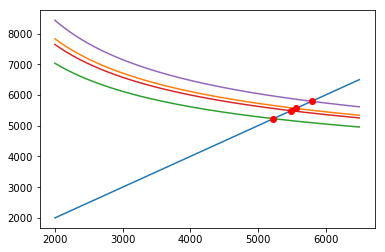

[ 5503.40496174] [ 5097.69338985] [ 5411.44008841] [ 5794.85842086]
5451.84921522


In [41]:
plt.plot(wtoGuess,wtoGuess)
plt.plot(wtoGuess,wtoYaxisRaymer)
plt.plot(wtoGuess,wtoYaxisGud)
plt.plot(wtoGuess,wtoYaxisRoskam)
plt.plot(wtoGuess,wtoYaxisSadraey)

idx = np.argwhere(np.diff(np.sign(wtoGuess-wtoYaxisRaymer))!=0).reshape(-1)+0
plt.plot(wtoGuess[idx], wtoYaxisRaymer[idx], 'ro')

idx = np.argwhere(np.diff(np.sign(wtoGuess-wtoYaxisGud))!=0).reshape(-1)+0
plt.plot(wtoGuess[idx], wtoYaxisGud[idx], 'ro')

idx = np.argwhere(np.diff(np.sign(wtoGuess-wtoYaxisRoskam))!=0).reshape(-1)+0
plt.plot(wtoGuess[idx], wtoYaxisRoskam[idx], 'ro')

idx = np.argwhere(np.diff(np.sign(wtoGuess-wtoYaxisSadraey))!=0).reshape(-1)+0
plt.plot(wtoGuess[idx], wtoYaxisSadraey[idx], 'ro')

plt.show()

d = wtoYaxisRaymer[idx]
e = wtoYaxisGud[idx]
f = wtoYaxisRoskam[idx]
g = wtoYaxisSadraey[idx]

h= np.array([d,e,f,g])
finalMTOW = np.mean(h)

print(d,e,f,g)
print(finalMTOW)